<a href="https://colab.research.google.com/github/saiavinashreddy7/ECG-Cardio-Diagnostic-System/blob/main/Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip -q data.zip -d data_folder
!ls data_folder



'ECG Images of Myocardial Infarction Patients (240x12=2880)'
'ECG Images of Patient that have abnormal heartbeat (233x12=2796)'
'ECG Images of Patient that have History of MI (172x12=2064)'
'Normal Person ECG Images (284x12=3408)'


In [ ]:
!ls data_folder



'ECG Images of Myocardial Infarction Patients (240x12=2880)'
'ECG Images of Patient that have abnormal heartbeat (233x12=2796)'
'ECG Images of Patient that have History of MI (172x12=2064)'
'Normal Person ECG Images (284x12=3408)'


In [ ]:
import os


base = "data_folder"

rename_map = {
    "ECG Images of Myocardial Infarction Patients": "MI",
    "ECG Images of Patient that have abnormal heartbeat": "AH",
    "ECG Images of Patient that have History of MI": "HMI",
    "Normal Person ECG Images": "NP"
}

for old, new in rename_map.items():
    old_path = os.path.join(base, old)
    new_path = os.path.join(base, new)
    if os.path.exists(old_path):
        os.rename(old_path, new_path)

print("Folders renamed successfully!")
!ls data_folder


Folders renamed successfully!
'ECG Images of Myocardial Infarction Patients (240x12=2880)'
'ECG Images of Patient that have abnormal heartbeat (233x12=2796)'
'ECG Images of Patient that have History of MI (172x12=2064)'
'Normal Person ECG Images (284x12=3408)'


In [ ]:
!ls -R data_folder



data_folder:
'ECG Images of Myocardial Infarction Patients (240x12=2880)'
'ECG Images of Patient that have abnormal heartbeat (233x12=2796)'
'ECG Images of Patient that have History of MI (172x12=2064)'
'Normal Person ECG Images (284x12=3408)'

'data_folder/ECG Images of Myocardial Infarction Patients (240x12=2880)':
'MI(100).jpg'  'MI(144).jpg'  'MI(188).jpg'  'MI(231).jpg'  'MI(58).jpg'
'MI(101).jpg'  'MI(145).jpg'  'MI(189).jpg'  'MI(232).jpg'  'MI(59).jpg'
'MI(102).jpg'  'MI(146).jpg'  'MI(18).jpg'   'MI(233).jpg'  'MI(5).jpg'
'MI(103).jpg'  'MI(147).jpg'  'MI(190).jpg'  'MI(234).jpg'  'MI(60).jpg'
'MI(104).jpg'  'MI(148).jpg'  'MI(191).jpg'  'MI(235).jpg'  'MI(61).jpg'
'MI(105).jpg'  'MI(149).jpg'  'MI(192).jpg'  'MI(236).jpg'  'MI(62).jpg'
'MI(106).jpg'  'MI(14).jpg'   'MI(193).jpg'  'MI(237).jpg'  'MI(63).jpg'
'MI(107).jpg'  'MI(150).jpg'  'MI(194).jpg'  'MI(238).jpg'  'MI(64).jpg'
'MI(108).jpg'  'MI(151).jpg'  'MI(195).jpg'  'MI(239).jpg'  'MI(65).jpg'
'MI(109).jpg'  'MI(152).j

In [ ]:
import os

base = "data_folder"

rename_map = {
    "ECG Images of Myocardial Infarction Patients (240x12=2880)": "MI",
    "ECG Images of Patient that have abnormal heartbeat (233x12=2796)": "AH",
    "ECG Images of Patient that have History of MI (172x12=2064)": "HMI",
    "Normal Person ECG Images (284x12=3408)": "NP"
}

for old, new in rename_map.items():
    old_path = os.path.join(base, old)
    new_path = os.path.join(base, new)
    if os.path.exists(old_path):
        os.rename(old_path, new_path)

print("Renaming completed.")

!ls data_folder


Renaming completed.
AH  HMI  MI  NP


In [ ]:
import cv2
import numpy as np
import os
from PIL import Image
from tqdm import tqdm

input_root = "data_folder"
output_root = "processed_data"
classes = ["NP", "AH", "MI", "HMI"]

os.makedirs(output_root, exist_ok=True)

def crop_header_footer(img, tol=0.02):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    row_mean = gray.mean(axis=1) / 255.0
    thresh = np.median(row_mean) * (1 - tol)
    rows = np.where(row_mean < thresh)[0]
    if len(rows) == 0:
        return img
    top, bottom = rows[0], rows[-1]
    pad = int(0.02 * img.shape[0])
    top = max(0, top - pad)
    bottom = min(img.shape[0]-1, bottom + pad)
    return img[top:bottom+1, :, :]

size = (227, 227)

for cls in classes:
    in_dir = os.path.join(input_root, cls)
    out_dir = os.path.join(output_root, cls)
    os.makedirs(out_dir, exist_ok=True)

    for img_name in tqdm(os.listdir(in_dir), desc=f"Processing {cls}"):
        img_path = os.path.join(in_dir, img_name)

        if not img_path.lower().endswith((".png", ".jpg", ".jpeg")):
            continue

        img = Image.open(img_path).convert("RGB")
        img = np.array(img)

        img = crop_header_footer(img)
        img = cv2.resize(img, size)

        out_img = Image.fromarray(img)
        out_img.save(os.path.join(out_dir, img_name))


Processing HMI: 100%|██████████| 172/172 [00:07<00:00, 21.76it/s]


In [ ]:
# install albumentations if not yet installed
!pip install -q albumentations


In [ ]:
# install / upgrade albumentations
!pip install -q --upgrade albumentations


In [ ]:
# 1) Install / upgrade albumentations (safe)
!pip install -q --upgrade albumentations


In [ ]:

import os, random
from PIL import Image
import numpy as np
from tqdm import tqdm
import albumentations as A

aug = A.Compose([
    A.Rotate(limit=20, p=0.6),
    A.HorizontalFlip(p=0.5),

    A.Affine(translate_percent={"x":0.05, "y":0.05}, scale=(0.95, 1.05), rotate=0, p=0.6),

    A.RandomCrop(height=200, width=200, p=0.4),
    A.Resize(height=227, width=227, p=1.0)
])


test_img_path = "processed_data/NP/Normal(1).jpg"
if not os.path.exists(test_img_path):

    for root,_,files in os.walk("processed_data"):
        for f in files:
            if f.lower().endswith(('.png','.jpg','.jpeg')):
                test_img_path = os.path.join(root,f)
                break
        if os.path.exists(test_img_path):
            break

print("Using test image:", test_img_path)
img = np.array(Image.open(test_img_path).convert('RGB'))
aug_img = aug(image=img)['image']
Image.fromarray(aug_img).save('aug_test.png')
print("Saved aug_test.png — check Files panel (left) for verification.")


Using test image: processed_data/NP/Normal(1).jpg
Saved aug_test.png — check Files panel (left) for verification.


In [ ]:
!ls


augmented_data	data_folder  processed_data	sample_data
aug_test.png	data.zip     results_customcnn


In [ ]:
import os, shutil, sys


processed_root = "processed_data"
aug_root = "augmented_data"
classes = ["NP","AH","MI","HMI"]

os.makedirs(aug_root, exist_ok=True)


missing = []
for c in classes:
    folder = os.path.join(aug_root, c)
    if not os.path.exists(folder) or len([f for f in os.listdir(folder) if f.lower().endswith(('.png','.jpg','.jpeg'))]) == 0:
        missing.append(c)

if missing:
    print("Missing classes in augmented_data:", missing)

    if not os.path.exists(processed_root):
        raise FileNotFoundError(f"Processed data folder not found: {processed_root}. Run preprocessing first.")

    for c in classes:
        src = os.path.join(processed_root, c)
        dst = os.path.join(aug_root, c)
        if os.path.exists(src):
            os.makedirs(dst, exist_ok=True)

            copied = 0
            for f in os.listdir(src):
                if not f.lower().endswith(('.png','.jpg','.jpeg')):
                    continue
                srcf = os.path.join(src, f)
                dstf = os.path.join(dst, f)
                if not os.path.exists(dstf):
                    shutil.copyfile(srcf, dstf)
                    copied += 1
            print(f"Copied {copied} files to {dst}")
        else:
            print(f"Processed source folder missing: {src} — cannot copy. Please check preprocessing.")
    print("Copy complete. Re-check augmented_data folders.")
else:
    print("All class folders present in augmented_data and appear non-empty.")


for c in classes:
    p = os.path.join(aug_root, c)
    if os.path.exists(p):
        print(f"{p}: {len([f for f in os.listdir(p) if f.lower().endswith(('.png','.jpg','.jpeg'))])} images")
    else:
        print(f"{p}: (missing)")


Missing classes in augmented_data: ['NP', 'AH', 'MI', 'HMI']
Copied 284 files to augmented_data/NP
Copied 233 files to augmented_data/AH
Copied 239 files to augmented_data/MI
Copied 172 files to augmented_data/HMI
Copy complete. Re-check augmented_data folders.
augmented_data/NP: 284 images
augmented_data/AH: 233 images
augmented_data/MI: 239 images
augmented_data/HMI: 172 images


In [ ]:
import glob, numpy as np, pandas as pd, os
from sklearn.model_selection import StratifiedKFold

data_root = "augmented_data"
classes = ["NP","AH","MI","HMI"]
class_to_idx = {c:i for i,c in enumerate(classes)}


for c in classes:
    p = os.path.join(data_root, c)
    if not os.path.exists(p) or len([f for f in os.listdir(p) if f.lower().endswith(('.png','.jpg','.jpeg'))])==0:
        raise FileNotFoundError(f"Folder missing or empty: {p}. Please run the previous cell or check your data.")


filepaths = []
labels = []
for c in classes:
    files = [os.path.join(data_root,c,f) for f in os.listdir(os.path.join(data_root,c)) if f.lower().endswith(('.png','.jpg','.jpeg'))]
    filepaths.extend(files)
    labels.extend([class_to_idx[c]] * len(files))

filepaths = np.array(filepaths)
labels = np.array(labels)
print("Total images collected:", len(filepaths))


df = pd.DataFrame({"filepath": filepaths, "label": labels})
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
df['fold'] = -1
for fold, (_, test_idx) in enumerate(skf.split(df['filepath'], df['label'])):
    df.loc[test_idx, 'fold'] = fold

df.to_csv("data_folds.csv", index=False)
print("Saved data_folds.csv")
print(df.groupby(['fold','label']).size().unstack(fill_value=0))


Total images collected: 928
Saved data_folds.csv
label   0   1   2   3
fold                 
0      57  47  48  34
1      57  47  47  35
2      57  46  48  35
3      57  46  48  34
4      56  47  48  34


In [ ]:

import os, numpy as np, pandas as pd, tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, CSVLogger
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix


IMG_SIZE = (227,227)
BATCH_SIZE = 64
EPOCHS = 2
LR = 1e-4
NUM_CLASSES = 4
RESULTS_DIR = "quick_test_results"
os.makedirs(RESULTS_DIR, exist_ok=True)


df = pd.read_csv("data_folds.csv")
classes = ["NP","AH","MI","HMI"]

AUTOTUNE = tf.data.AUTOTUNE
def dataset_from_filepaths(filepaths, labels, batch_size=BATCH_SIZE, shuffle=True):
    def _load(path, label):
        img = tf.io.read_file(path)
        img = tf.image.decode_png(img, channels=3)
        img = tf.image.convert_image_dtype(img, tf.float32)
        img = tf.image.resize(img, IMG_SIZE)
        return img, tf.one_hot(label, depth=len(classes))
    ds = tf.data.Dataset.from_tensor_slices((filepaths, labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(filepaths))
    ds = ds.map(_load, num_parallel_calls=AUTOTUNE)
    ds = ds.batch(batch_size).prefetch(AUTOTUNE)
    return ds


def build_custom_cnn(input_shape=(227,227,3), num_classes=4):
    inp = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, 3, padding='same')(inp)
    x = layers.LeakyReLU(0.1)(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool2D()(x)
    x = layers.Conv2D(64, 3, padding='same')(x)
    x = layers.LeakyReLU(0.1)(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool2D()(x)
    x = layers.Conv2D(128, 3, padding='same')(x)
    x = layers.LeakyReLU(0.1)(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool2D()(x)
    stack_branch = layers.GlobalAveragePooling2D()(x)

    y = layers.Flatten()(inp)
    y = layers.Dense(128, activation='relu')(y)
    y = layers.Reshape((1,1,128))(y)
    y = layers.Conv2D(64, 1, padding='same', activation='relu')(y)
    y = layers.Conv2D(32, 1, padding='same', activation='relu')(y)
    full_branch = layers.GlobalAveragePooling2D()(y)

    merged = layers.Concatenate()([stack_branch, full_branch])
    z = layers.Dense(512, activation='relu')(merged)
    out = layers.Dense(num_classes, activation='softmax')(z)
    return models.Model(inputs=inp, outputs=out)


fold = 0
train_df = df[df['fold'] != fold].reset_index(drop=True)
test_df  = df[df['fold'] == fold].reset_index(drop=True)
train_ds = dataset_from_filepaths(train_df['filepath'].values, train_df['label'].values, batch_size=BATCH_SIZE, shuffle=True)
val_ds   = dataset_from_filepaths(test_df['filepath'].values,  test_df['label'].values,  batch_size=BATCH_SIZE, shuffle=False)

print("Train size:", len(train_df), "Val size:", len(test_df))

model = build_custom_cnn()
model.compile(optimizer=tf.keras.optimizers.Adam(LR), loss='categorical_crossentropy', metrics=['accuracy'])

ckpt = ModelCheckpoint(os.path.join(RESULTS_DIR,'best.h5'), monitor='val_accuracy', save_best_only=True, verbose=1)
rlr  = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1, min_lr=1e-7)
es   = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True, verbose=1)
csv  = CSVLogger(os.path.join(RESULTS_DIR,'log.csv'))

history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS, callbacks=[ckpt, rlr, es, csv], verbose=2)


model.load_weights(os.path.join(RESULTS_DIR,'best.h5'))
y_true, y_pred = [], []
for Xb, Yb in val_ds:
    probs = model.predict(Xb, verbose=0)
    y_pred.extend(probs.argmax(axis=1).tolist())
    y_true.extend(Yb.numpy().argmax(axis=1).tolist())

acc = accuracy_score(y_true, y_pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro', zero_division=0)
print(f"Quick test results -> acc={acc:.4f}, prec={prec:.4f}, rec={rec:.4f}, f1={f1:.4f}")


Train size: 742 Val size: 186
Epoch 1/2

Epoch 1: val_accuracy improved from -inf to 0.30645, saving model to quick_test_results/best.h5


12/12 - 103s - 9s/step - accuracy: 0.2871 - loss: 1.5971 - val_accuracy: 0.3065 - val_loss: 1.4993 - learning_rate: 1.0000e-04
Epoch 2/2

Epoch 2: val_accuracy did not improve from 0.30645
12/12 - 138s - 11s/step - accuracy: 0.3841 - loss: 1.3234 - val_accuracy: 0.3065 - val_loss: 1.4484 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 2.
Quick test results -> acc=0.3065, prec=0.0766, rec=0.2500, f1=0.1173


In [ ]:

import os, numpy as np, pandas as pd, tensorflow as tf, matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, CSVLogger
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

IMG_SIZE = (227,227)
BATCH_SIZE = 64
EPOCHS = 16
LR = 1e-4
NUM_CLASSES = 4
RESULTS_DIR = "results_customcnn_full"
os.makedirs(RESULTS_DIR, exist_ok=True)

df = pd.read_csv("data_folds.csv")
classes = ["NP","AH","MI","HMI"]
AUTOTUNE = tf.data.AUTOTUNE
def dataset_from_filepaths(filepaths, labels, batch_size=BATCH_SIZE, shuffle=True):
    def _load(path, label):
        img = tf.io.read_file(path)
        img = tf.image.decode_png(img, channels=3)
        img = tf.image.convert_image_dtype(img, tf.float32)
        img = tf.image.resize(img, IMG_SIZE)
        return img, tf.one_hot(label, depth=len(classes))
    ds = tf.data.Dataset.from_tensor_slices((filepaths, labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(filepaths))
    ds = ds.map(_load, num_parallel_calls=AUTOTUNE)
    ds = ds.batch(batch_size).prefetch(AUTOTUNE)
    return ds

def build_custom_cnn(input_shape=(227,227,3), num_classes=4):
    inp = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, 3, padding='same')(inp)
    x = layers.LeakyReLU(0.1)(x); x = layers.BatchNormalization()(x); x = layers.MaxPool2D()(x)
    x = layers.Conv2D(64, 3, padding='same')(x)
    x = layers.LeakyReLU(0.1)(x); x = layers.BatchNormalization()(x); x = layers.MaxPool2D()(x)
    x = layers.Conv2D(128, 3, padding='same')(x)
    x = layers.LeakyReLU(0.1)(x); x = layers.BatchNormalization()(x); x = layers.MaxPool2D()(x)
    stack_branch = layers.GlobalAveragePooling2D()(x)
    y = layers.Flatten()(inp); y = layers.Dense(128, activation='relu')(y)
    y = layers.Reshape((1,1,128))(y); y = layers.Conv2D(64,1,activation='relu')(y); y = layers.Conv2D(32,1,activation='relu')(y)
    full_branch = layers.GlobalAveragePooling2D()(y)
    merged = layers.Concatenate()([stack_branch, full_branch])
    z = layers.Dense(512, activation='relu')(merged)
    out = layers.Dense(num_classes, activation='softmax')(z)
    return models.Model(inputs=inp, outputs=out)

fold_metrics = []
for fold in range(5):
    print("\n=== Fold", fold, "===\n")
    train_df = df[df['fold'] != fold].reset_index(drop=True)
    test_df  = df[df['fold'] == fold].reset_index(drop=True)
    train_ds = dataset_from_filepaths(train_df['filepath'].values, train_df['label'].values, batch_size=BATCH_SIZE, shuffle=True)
    val_ds   = dataset_from_filepaths(test_df['filepath'].values,  test_df['label'].values,  batch_size=BATCH_SIZE, shuffle=False)

    model = build_custom_cnn()
    model.compile(optimizer=tf.keras.optimizers.Adam(LR), loss='categorical_crossentropy', metrics=['accuracy'])

    fold_dir = os.path.join(RESULTS_DIR, f"fold_{fold}")
    os.makedirs(fold_dir, exist_ok=True)
    ckpt = ModelCheckpoint(os.path.join(fold_dir,'best_model.h5'), monitor='val_accuracy', save_best_only=True, verbose=1)
    rlr  = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-7)
    es   = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True, verbose=1)
    csv  = CSVLogger(os.path.join(fold_dir,'training_log.csv'))

    history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS, callbacks=[ckpt, rlr, es, csv], verbose=2)
    model.load_weights(os.path.join(fold_dir,'best_model.h5'))

    y_true, y_pred = [], []
    for Xb, Yb in val_ds:
        probs = model.predict(Xb, verbose=0); y_pred.extend(probs.argmax(axis=1).tolist()); y_true.extend(Yb.numpy().argmax(axis=1).tolist())

    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro', zero_division=0)
    cm = confusion_matrix(y_true, y_pred)
    np.savetxt(os.path.join(fold_dir,'confusion_matrix.csv'), cm, fmt='%d', delimiter=',')

    fold_metrics.append({'fold':fold,'acc':acc,'precision':prec,'recall':rec,'f1':f1,'test_size':len(test_df)})
    tf.keras.backend.clear_session()
    del model

results_df = pd.DataFrame(fold_metrics)
results_df.to_csv(os.path.join(RESULTS_DIR,'fold_metrics.csv'), index=False)
print("\nAll folds finished. Summary:")
print(results_df)
print(results_df[['acc','precision','recall','f1']].agg(['mean','std']))



=== Fold 0 ===

Epoch 1/16

Epoch 1: val_accuracy improved from -inf to 0.30645, saving model to results_customcnn_full/fold_0/best_model.h5


12/12 - 101s - 8s/step - accuracy: 0.2844 - loss: 1.5421 - val_accuracy: 0.3065 - val_loss: 1.3795 - learning_rate: 1.0000e-04
Epoch 2/16

Epoch 2: val_accuracy did not improve from 0.30645
12/12 - 142s - 12s/step - accuracy: 0.3208 - loss: 1.3624 - val_accuracy: 0.3065 - val_loss: 1.4145 - learning_rate: 1.0000e-04
Epoch 3/16

Epoch 3: val_accuracy did not improve from 0.30645
12/12 - 140s - 12s/step - accuracy: 0.3949 - loss: 1.3087 - val_accuracy: 0.3065 - val_loss: 1.4928 - learning_rate: 1.0000e-04
Epoch 4/16

Epoch 4: val_accuracy did not improve from 0.30645

Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
12/12 - 148s - 12s/step - accuracy: 0.4528 - loss: 1.2632 - val_accuracy: 0.3065 - val_loss: 1.6034 - learning_rate: 1.0000e-04
Epoch 5/16

Epoch 5: val_accuracy did not improve from 0.30645
12/12 - 140s - 12s/step - accuracy: 0.4825 - loss: 1.2299 - val_accuracy: 0.3065 - val_loss: 1.7173 - learning_rate: 5.0000e-05
Epoch 6/16

Epoch 6: val_accurac

12/12 - 96s - 8s/step - accuracy: 0.2507 - loss: 1.5094 - val_accuracy: 0.3065 - val_loss: 1.5073 - learning_rate: 1.0000e-04
Epoch 2/16

Epoch 2: val_accuracy did not improve from 0.30645
12/12 - 91s - 8s/step - accuracy: 0.4043 - loss: 1.3446 - val_accuracy: 0.3065 - val_loss: 1.4178 - learning_rate: 1.0000e-04
Epoch 3/16

Epoch 3: val_accuracy did not improve from 0.30645
12/12 - 107s - 9s/step - accuracy: 0.3315 - loss: 1.3372 - val_accuracy: 0.3065 - val_loss: 1.8446 - learning_rate: 1.0000e-04
Epoch 4/16

Epoch 4: val_accuracy improved from 0.30645 to 0.34409, saving model to results_customcnn_full/fold_1/best_model.h5


12/12 - 130s - 11s/step - accuracy: 0.4218 - loss: 1.2398 - val_accuracy: 0.3441 - val_loss: 1.4544 - learning_rate: 1.0000e-04
Epoch 5/16

Epoch 5: val_accuracy did not improve from 0.34409

Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
12/12 - 92s - 8s/step - accuracy: 0.4582 - loss: 1.2163 - val_accuracy: 0.3065 - val_loss: 1.9335 - learning_rate: 1.0000e-04
Epoch 6/16

Epoch 6: val_accuracy did not improve from 0.34409
12/12 - 93s - 8s/step - accuracy: 0.5216 - loss: 1.1373 - val_accuracy: 0.3065 - val_loss: 2.0719 - learning_rate: 5.0000e-05
Epoch 7/16

Epoch 7: val_accuracy did not improve from 0.34409
12/12 - 144s - 12s/step - accuracy: 0.5054 - loss: 1.1386 - val_accuracy: 0.3065 - val_loss: 2.0545 - learning_rate: 5.0000e-05
Epoch 8/16

Epoch 8: val_accuracy did not improve from 0.34409

Epoch 8: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
12/12 - 102s - 8s/step - accuracy: 0.5377 - loss: 1.1213 - val_accuracy: 0.3065 - val_


=== Fold 2 ===

Epoch 1/16

Epoch 1: val_accuracy improved from -inf to 0.18817, saving model to results_customcnn_full/fold_2/best_model.h5


12/12 - 98s - 8s/step - accuracy: 0.2965 - loss: 1.4452 - val_accuracy: 0.1882 - val_loss: 1.5069 - learning_rate: 1.0000e-04
Epoch 2/16

Epoch 2: val_accuracy did not improve from 0.18817
12/12 - 94s - 8s/step - accuracy: 0.3720 - loss: 1.2927 - val_accuracy: 0.1882 - val_loss: 1.4334 - learning_rate: 1.0000e-04
Epoch 3/16

Epoch 3: val_accuracy improved from 0.18817 to 0.30645, saving model to results_customcnn_full/fold_2/best_model.h5


12/12 - 142s - 12s/step - accuracy: 0.4501 - loss: 1.2535 - val_accuracy: 0.3065 - val_loss: 1.3934 - learning_rate: 1.0000e-04
Epoch 4/16

Epoch 4: val_accuracy did not improve from 0.30645
12/12 - 93s - 8s/step - accuracy: 0.4811 - loss: 1.2367 - val_accuracy: 0.1882 - val_loss: 1.6035 - learning_rate: 1.0000e-04
Epoch 5/16

Epoch 5: val_accuracy improved from 0.30645 to 0.39785, saving model to results_customcnn_full/fold_2/best_model.h5


12/12 - 93s - 8s/step - accuracy: 0.4353 - loss: 1.1947 - val_accuracy: 0.3978 - val_loss: 1.5586 - learning_rate: 1.0000e-04
Epoch 6/16

Epoch 6: val_accuracy did not improve from 0.39785

Epoch 6: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
12/12 - 102s - 9s/step - accuracy: 0.5243 - loss: 1.1368 - val_accuracy: 0.1882 - val_loss: 1.6648 - learning_rate: 1.0000e-04
Epoch 7/16

Epoch 7: val_accuracy did not improve from 0.39785
12/12 - 93s - 8s/step - accuracy: 0.6307 - loss: 1.0870 - val_accuracy: 0.1882 - val_loss: 1.5505 - learning_rate: 5.0000e-05
Epoch 8/16

Epoch 8: val_accuracy did not improve from 0.39785
12/12 - 145s - 12s/step - accuracy: 0.6321 - loss: 1.0511 - val_accuracy: 0.1882 - val_loss: 1.6589 - learning_rate: 5.0000e-05
Epoch 9/16

Epoch 9: val_accuracy improved from 0.39785 to 0.46237, saving model to results_customcnn_full/fold_2/best_model.h5



Epoch 9: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
12/12 - 100s - 8s/step - accuracy: 0.6604 - loss: 1.0230 - val_accuracy: 0.4624 - val_loss: 1.6012 - learning_rate: 5.0000e-05
Epoch 9: early stopping
Restoring model weights from the end of the best epoch: 3.



=== Fold 3 ===

Epoch 1/16

Epoch 1: val_accuracy improved from -inf to 0.25946, saving model to results_customcnn_full/fold_3/best_model.h5


12/12 - 105s - 9s/step - accuracy: 0.2476 - loss: 1.6196 - val_accuracy: 0.2595 - val_loss: 1.6025 - learning_rate: 1.0000e-04
Epoch 2/16

Epoch 2: val_accuracy did not improve from 0.25946
12/12 - 104s - 9s/step - accuracy: 0.3149 - loss: 1.3833 - val_accuracy: 0.2595 - val_loss: 1.5846 - learning_rate: 1.0000e-04
Epoch 3/16

Epoch 3: val_accuracy did not improve from 0.25946
12/12 - 95s - 8s/step - accuracy: 0.3822 - loss: 1.3389 - val_accuracy: 0.2595 - val_loss: 1.5266 - learning_rate: 1.0000e-04
Epoch 4/16

Epoch 4: val_accuracy did not improve from 0.25946
12/12 - 143s - 12s/step - accuracy: 0.4159 - loss: 1.2644 - val_accuracy: 0.2595 - val_loss: 1.4931 - learning_rate: 1.0000e-04
Epoch 5/16

Epoch 5: val_accuracy did not improve from 0.25946
12/12 - 94s - 8s/step - accuracy: 0.4401 - loss: 1.2431 - val_accuracy: 0.2595 - val_loss: 1.6321 - learning_rate: 1.0000e-04
Epoch 6/16

Epoch 6: val_accuracy did not improve from 0.25946
12/12 - 92s - 8s/step - accuracy: 0.5908 - loss: 1.

12/12 - 100s - 8s/step - accuracy: 0.5047 - loss: 1.1687 - val_accuracy: 0.4270 - val_loss: 1.5436 - learning_rate: 1.0000e-04
Epoch 8/16

Epoch 8: val_accuracy did not improve from 0.42703
12/12 - 113s - 9s/step - accuracy: 0.5303 - loss: 1.1524 - val_accuracy: 0.3081 - val_loss: 1.5845 - learning_rate: 1.0000e-04
Epoch 9/16

Epoch 9: val_accuracy improved from 0.42703 to 0.49730, saving model to results_customcnn_full/fold_3/best_model.h5



Epoch 9: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
12/12 - 133s - 11s/step - accuracy: 0.5559 - loss: 1.1014 - val_accuracy: 0.4973 - val_loss: 1.7661 - learning_rate: 1.0000e-04
Epoch 10/16

Epoch 10: val_accuracy did not improve from 0.49730
12/12 - 103s - 9s/step - accuracy: 0.6124 - loss: 1.0736 - val_accuracy: 0.2595 - val_loss: 1.6937 - learning_rate: 5.0000e-05
Epoch 11/16

Epoch 11: val_accuracy did not improve from 0.49730
12/12 - 133s - 11s/step - accuracy: 0.6299 - loss: 1.0419 - val_accuracy: 0.2919 - val_loss: 1.7231 - learning_rate: 5.0000e-05
Epoch 12/16

Epoch 12: val_accuracy did not improve from 0.49730

Epoch 12: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
12/12 - 91s - 8s/step - accuracy: 0.6366 - loss: 1.0167 - val_accuracy: 0.3081 - val_loss: 1.7783 - learning_rate: 5.0000e-05
Epoch 12: early stopping
Restoring model weights from the end of the best epoch: 6.

=== Fold 4 ===

Epoch 1/16

Epoch 1: val_accuracy improv

12/12 - 115s - 10s/step - accuracy: 0.2921 - loss: 1.6069 - val_accuracy: 0.3027 - val_loss: 1.5022 - learning_rate: 1.0000e-04
Epoch 2/16

Epoch 2: val_accuracy did not improve from 0.30270
12/12 - 95s - 8s/step - accuracy: 0.4132 - loss: 1.3492 - val_accuracy: 0.1838 - val_loss: 1.5904 - learning_rate: 1.0000e-04
Epoch 3/16

Epoch 3: val_accuracy did not improve from 0.30270
12/12 - 141s - 12s/step - accuracy: 0.3607 - loss: 1.3361 - val_accuracy: 0.1838 - val_loss: 1.5402 - learning_rate: 1.0000e-04
Epoch 4/16

Epoch 4: val_accuracy did not improve from 0.30270

Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
12/12 - 140s - 12s/step - accuracy: 0.4805 - loss: 1.2270 - val_accuracy: 0.1838 - val_loss: 1.8106 - learning_rate: 1.0000e-04
Epoch 5/16

Epoch 5: val_accuracy did not improve from 0.30270
12/12 - 92s - 8s/step - accuracy: 0.4630 - loss: 1.1978 - val_accuracy: 0.3027 - val_loss: 1.8114 - learning_rate: 5.0000e-05
Epoch 6/16

Epoch 6: val_accuracy i

12/12 - 172s - 14s/step - accuracy: 0.5276 - loss: 1.1614 - val_accuracy: 0.3243 - val_loss: 1.8062 - learning_rate: 5.0000e-05
Epoch 7/16

Epoch 7: val_accuracy did not improve from 0.32432

Epoch 7: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
12/12 - 115s - 10s/step - accuracy: 0.5585 - loss: 1.1469 - val_accuracy: 0.3027 - val_loss: 1.9711 - learning_rate: 5.0000e-05
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 1.

All folds finished. Summary:
   fold       acc  precision    recall        f1  test_size
0     0  0.306452   0.076613  0.250000  0.117284        186
1     1  0.344086   0.306052  0.324561  0.222636        186
2     2  0.462366   0.340764  0.401042  0.321489        186
3     3  0.497297   0.299927  0.432292  0.334157        185
4     4  0.324324   0.278625  0.366071  0.242415        185
           acc  precision    recall        f1
mean  0.386905   0.260396  0.354793  0.247596
std   0.086752   0.105137  0.071007  0.

NP count: 284


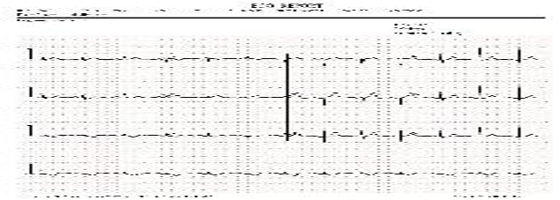

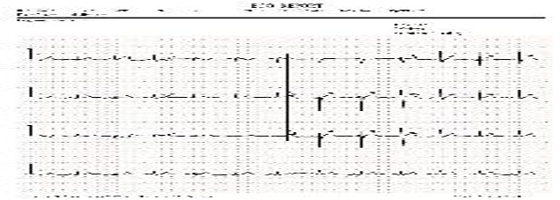

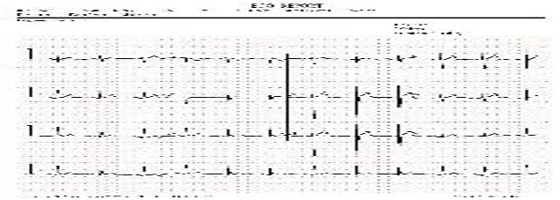

AH count: 233


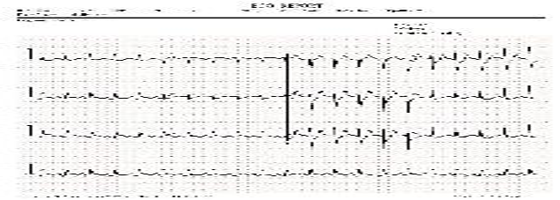

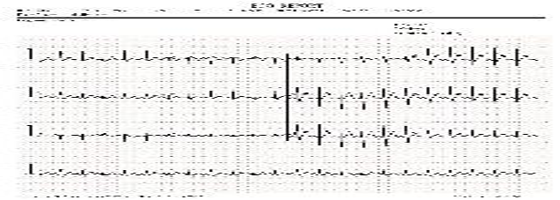

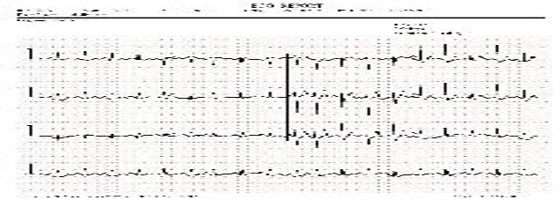

MI count: 239


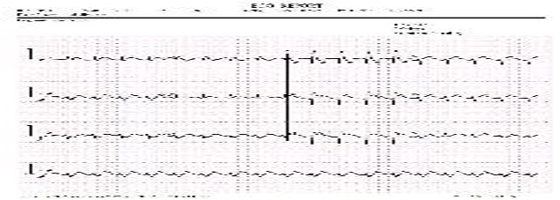

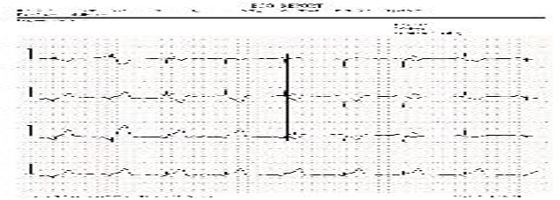

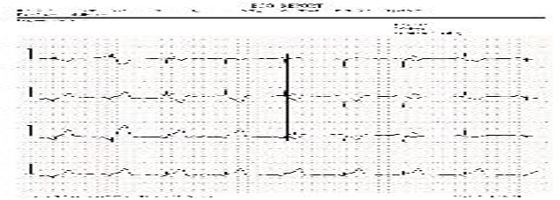

HMI count: 172


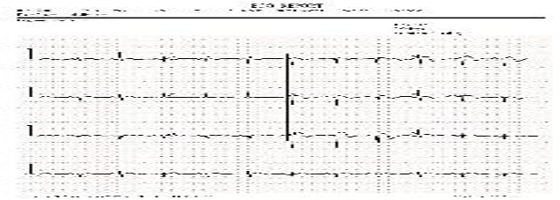

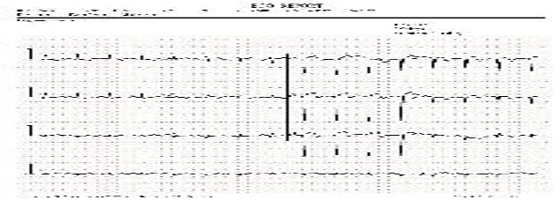

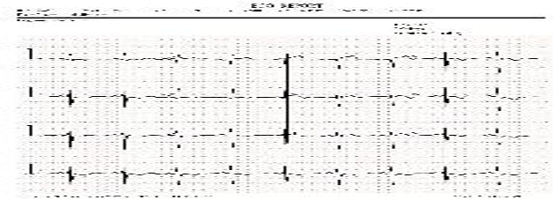

In [ ]:

feat_extractor = tf.keras.Model(inputs=tl_model.input, outputs=tl_model.layers[-2].output)  # adjust index

def extract_feats(file_list):
    feats = []
    for p in file_list:
        img = tf.io.read_file(p)
        img = tf.image.decode_png(img, channels=3)
        img = tf.image.convert_image_dtype(img, tf.float32)
        img = tf.image.resize(img, (227,227))
        img = tf.expand_dims(img, 0)
        f = feat_extractor.predict(img)
        feats.append(f.squeeze())
    return np.array(feats)


X_train = extract_feats(train_df['filepath'].values)
X_test  = extract_feats(test_df['filepath'].values)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, train_df['label'].values)
y_pred = gnb.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_df['label'].values, y_pred))
print(confusion_matrix(test_df['label'].values, y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
import os
from PIL import Image
import numpy as np


outdir = "misclassified_examples"
os.makedirs(outdir, exist_ok=True)


val_filepaths = list(test_df['filepath'].values)

for i, (true, pred) in enumerate(zip(y_true, y_pred)):
    if true != pred:
        fname = os.path.basename(val_filepaths[i])
        cls_true = classes[true]
        cls_pred = classes[pred]
        save_name = f"{i}_true_{cls_true}_pred_{cls_pred}_{fname}"

        Image.open(val_filepaths[i]).resize((560,200)).save(os.path.join(outdir, save_name))

print("Saved some misclassified images to", outdir)


Saved some misclassified images to misclassified_examples


Total saved misclassified examples: 85


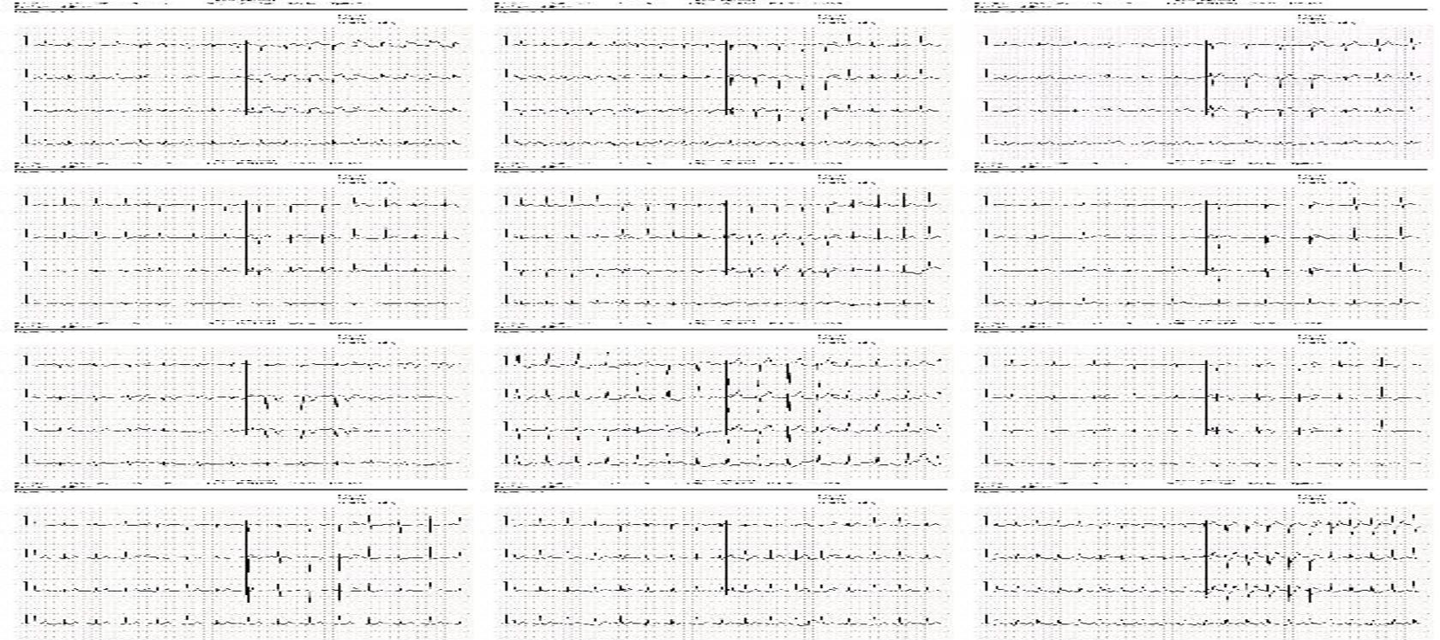

1. true→pred: MI → NP 144_true_MI_pred_NP_MI(237).jpg
2. true→pred: AH → HMI 84_true_AH_pred_HMI_HB(215).jpg
3. true→pred: NP → MI 46_true_NP_pred_MI_Normal(24).jpg
4. true→pred: NP → HMI 53_true_NP_pred_HMI_Normal(154).jpg
5. true→pred: AH → NP 72_true_AH_pred_NP_HB(69).jpg
6. true→pred: HMI → NP 154_true_HMI_pred_NP_PMI(54).jpg
7. true→pred: HMI → NP 162_true_HMI_pred_NP_PMI(73).jpg
8. true→pred: AH → MI 99_true_AH_pred_MI_HB(208).jpg
9. true→pred: HMI → NP 173_true_HMI_pred_NP_PMI(13).jpg
10. true→pred: HMI → MI 152_true_HMI_pred_MI_PMI(126).jpg
11. true→pred: AH → MI 56_true_AH_pred_MI_HB(219).jpg
12. true→pred: AH → MI 61_true_AH_pred_MI_HB(127).jpg


In [ ]:

from PIL import Image, ImageOps, ImageDraw, ImageFont
import os, math, IPython.display as disp, textwrap, random

outdir = "misclassified_examples"
files = [f for f in os.listdir(outdir) if f.lower().endswith(('.png','.jpg','.jpeg'))]
print("Total saved misclassified examples:", len(files))
if len(files) == 0:
    print("No misclassified images found in", outdir)
else:
    N = 12
    sample = random.sample(files, min(N, len(files)))
    imgs = []
    captions = []
    for fname in sample:

        parts = fname.split('_')

        true_label = next((p for p in parts if p in ['NP','AH','MI','HMI']), "UNK")
        pred_label = None

        if "pred" in parts:
            idx = parts.index("pred")
            if idx+1 < len(parts):
                pred_label = parts[idx+1]

        if pred_label is None:

            tokens = [p for p in parts if p in ['NP','AH','MI','HMI']]
            if len(tokens) >= 2:
                true_label, pred_label = tokens[0], tokens[1]
            elif len(tokens) == 1:
                true_label, pred_label = tokens[0], "UNK"
            else:
                true_label, pred_label = "UNK","UNK"

        p = os.path.join(outdir, fname)
        im = Image.open(p).convert('RGB')
        im = ImageOps.fit(im, (480,160))

        caption = f"true→pred: {true_label} → {pred_label}\n{fname}"
        imgs.append(im)
        captions.append(caption)

    cols = 3
    rows = math.ceil(len(imgs)/cols)
    grid_w = cols * 480
    grid_h = rows * 160
    grid = Image.new('RGB', (grid_w, grid_h), (255,255,255))
    for i, im in enumerate(imgs):
        r = i // cols
        c = i % cols
        grid.paste(im, (c*480, r*160))
    display = disp.display
    display(grid)

    for i, cap in enumerate(captions):
        print(f"{i+1}. {textwrap.shorten(cap, width=120)}")


In [ ]:

import os, collections, re, pandas as pd

outdir = "misclassified_examples"
files = [f for f in os.listdir(outdir) if f.lower().endswith(('.png','.jpg','.jpeg'))]

pairs = []
for fname in files:

    m_true = re.search(r"true_([A-Za-z0-9]+)", fname)
    m_pred = re.search(r"pred_([A-Za-z0-9]+)", fname)
    t = m_true.group(1) if m_true else None
    p = m_pred.group(1) if m_pred else None

    if t is None:
        ts = [tok for tok in fname.split('_') if tok in ['NP','AH','MI','HMI']]
        if len(ts) > 0: t = ts[0]
    if p is None:
        ts = [tok for tok in fname.split('_') if tok in ['NP','AH','MI','HMI']]
        if len(ts) > 1: p = ts[1]
    pairs.append((t if t else 'UNK', p if p else 'UNK'))

cnt = collections.Counter(pairs)

rows = []
for (t,p),c in cnt.items():
    rows.append({'true':t, 'pred':p, 'count':c})
df_pairs = pd.DataFrame(rows).sort_values('count', ascending=False)
if df_pairs.empty:
    print("No pairs found. Filenames may not match the expected pattern.")
else:
    display(df_pairs.reset_index(drop=True))


true pred  count
0  HMI   NP     20
1   MI   NP     18
2   AH   MI     17
3   AH   NP     11
4   AH  HMI     10
5   NP   MI      3
6  HMI   MI      3
7   NP   AH      1
8   NP  HMI      1
9  HMI   AH      1

from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('true').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('pred').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['pred'].value_counts()
    for x_label, grp in _df_4.groupby('true')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('true')
_ = plt.ylabel('pred')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_5['true'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_5, x='count', y='true', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['pred'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='count', y='pred', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
RESULT_ROOT = "results_customcnn_full"


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


RESULT_ROOT = "results_customcnn_full"
IMAGE_ROOT = "augmented_data"
df = pd.read_csv("data_folds.csv")

classes = ["NP", "AH", "MI", "HMI"]
class_to_idx = {c:i for i,c in enumerate(classes)}

print("Using model folder:", RESULT_ROOT)


def build_feature_extractor(model_path):
    model = load_model(model_path, compile=False)
    feature_layer = model.get_layer(index=-2).output  # 512-dim layer
    extractor = Model(inputs=model.input, outputs=feature_layer)
    return extractor

def load_and_preprocess(path):
    img = tf.keras.preprocessing.image.load_img(path, target_size=(227,227))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    return img

def extract_features(extractor, file_list):
    x = np.array([load_and_preprocess(f) for f in file_list])
    feats = extractor.predict(x, verbose=0)
    return feats



ml_models = {
    "GaussianNB": GaussianNB(),
    "SVM": SVC(kernel="rbf", probability=True),
    "RandomForest": RandomForestClassifier(n_estimators=200),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "MLP": MLPClassifier(hidden_layer_sizes=(512,256), max_iter=500)
}

results = []


for fold in range(5):
    print(f"\n===== Fold {fold} =====")

    fold_dir = os.path.join(RESULT_ROOT, f"fold_{fold}")
    model_path = os.path.join(fold_dir, "best_model.h5")

    if not os.path.exists(model_path):
        raise FileNotFoundError(f"Model missing: {model_path}")

    extractor = build_feature_extractor(model_path)

    train_df = df[df.fold != fold]
    test_df  = df[df.fold == fold]

    X_train_paths = train_df.filepath.values
    X_test_paths  = test_df.filepath.values
    y_train = train_df.label.values
    y_test  = test_df.label.values

    print("Extracting training features...")
    X_train = extract_features(extractor, X_train_paths)

    print("Extracting test features...")
    X_test = extract_features(extractor, X_test_paths)


    fold_result = {"fold": fold}

    for name, model in ml_models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        acc = accuracy_score(y_test, preds)
        print(f"{name} Accuracy: {acc:.4f}")

        fold_result[name] = acc

    results.append(fold_result)


result_df = pd.DataFrame(results)
result_df.loc["mean"] = result_df.mean()
result_df.to_csv("ml_results.csv", index=False)

print("\n\n========== FINAL 5-FOLD RESULTS ==========\n")
print(result_df)


Using model folder: results_customcnn_full

===== Fold 0 =====
Extracting training features...
Extracting test features...

Training GaussianNB...
GaussianNB Accuracy: 0.6237

Training SVM...
SVM Accuracy: 0.3065

Training RandomForest...
RandomForest Accuracy: 0.9032

Training KNN...
KNN Accuracy: 0.6828

Training MLP...
MLP Accuracy: 0.3065

===== Fold 1 =====
Extracting training features...
Extracting test features...

Training GaussianNB...
GaussianNB Accuracy: 0.8172

Training SVM...
SVM Accuracy: 0.3065

Training RandomForest...
RandomForest Accuracy: 0.9570

Training KNN...
KNN Accuracy: 0.8871

Training MLP...
MLP Accuracy: 0.3710

===== Fold 2 =====
Extracting training features...
Extracting test features...

Training GaussianNB...
GaussianNB Accuracy: 0.8387

Training SVM...
SVM Accuracy: 0.3065

Training RandomForest...
RandomForest Accuracy: 0.9194

Training KNN...
KNN Accuracy: 0.8817

Training MLP...
MLP Accuracy: 0.6505

===== Fold 3 =====
Extracting training features...


===== Confusion Matrix & Report: Fold 0 =====
              precision    recall  f1-score   support

          NP       0.82      0.96      0.89        57
          AH       0.95      0.83      0.89        47
          MI       0.96      1.00      0.98        48
         HMI       1.00      0.82      0.90        34

    accuracy                           0.91       186
   macro avg       0.93      0.90      0.91       186
weighted avg       0.92      0.91      0.91       186



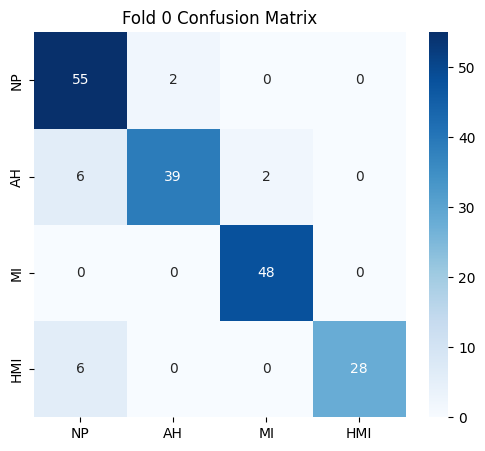


===== Confusion Matrix & Report: Fold 1 =====
              precision    recall  f1-score   support

          NP       0.90      0.96      0.93        57
          AH       0.95      0.87      0.91        47
          MI       1.00      1.00      1.00        47
         HMI       0.94      0.94      0.94        35

    accuracy                           0.95       186
   macro avg       0.95      0.95      0.95       186
weighted avg       0.95      0.95      0.95       186



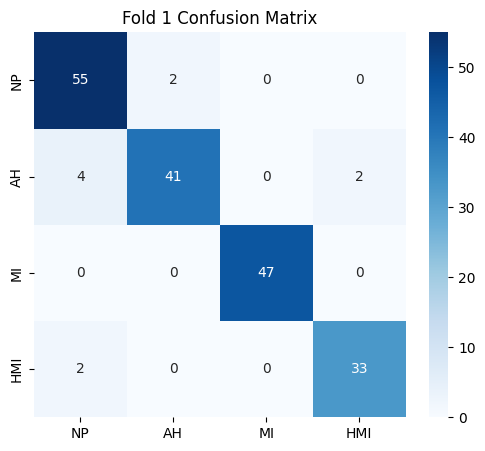


===== Confusion Matrix & Report: Fold 2 =====
              precision    recall  f1-score   support

          NP       0.85      1.00      0.92        57
          AH       0.95      0.78      0.86        46
          MI       1.00      1.00      1.00        48
         HMI       0.88      0.83      0.85        35

    accuracy                           0.91       186
   macro avg       0.92      0.90      0.91       186
weighted avg       0.92      0.91      0.91       186



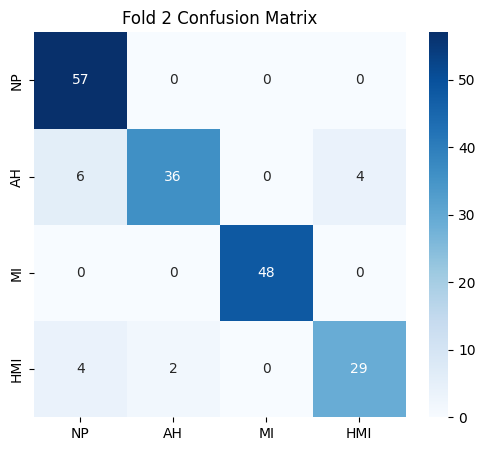


===== Confusion Matrix & Report: Fold 3 =====
              precision    recall  f1-score   support

          NP       0.85      0.96      0.90        57
          AH       1.00      0.74      0.85        46
          MI       1.00      1.00      1.00        48
         HMI       0.89      1.00      0.94        34

    accuracy                           0.92       185
   macro avg       0.94      0.93      0.92       185
weighted avg       0.93      0.92      0.92       185



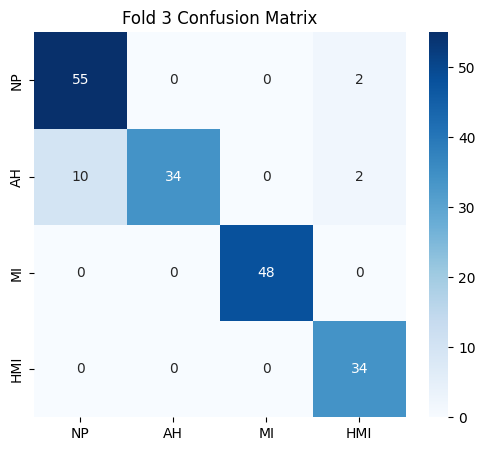


===== Confusion Matrix & Report: Fold 4 =====
              precision    recall  f1-score   support

          NP       0.95      0.93      0.94        56
          AH       1.00      0.85      0.92        47
          MI       0.96      1.00      0.98        48
         HMI       0.85      1.00      0.92        34

    accuracy                           0.94       185
   macro avg       0.94      0.94      0.94       185
weighted avg       0.95      0.94      0.94       185



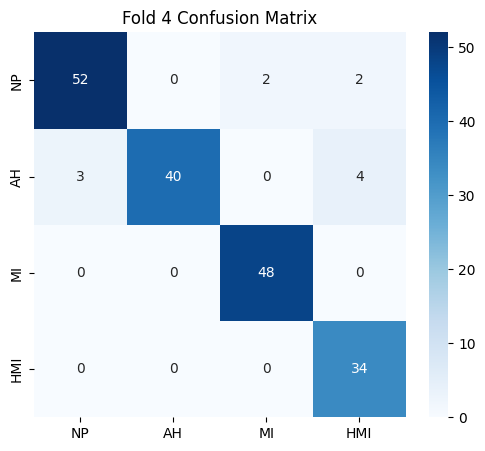

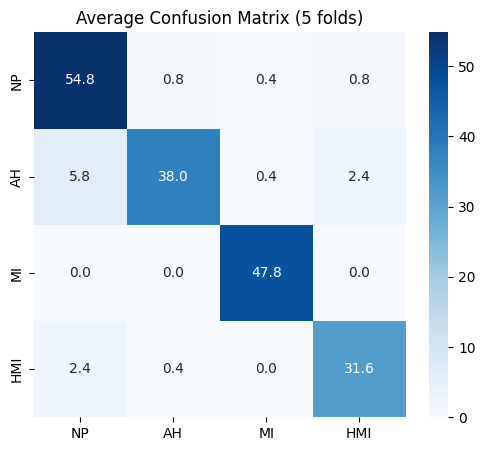

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("data_folds.csv")

classes = ["NP", "AH", "MI", "HMI"]
class_to_idx = {c:i for i,c in enumerate(classes)}
idx_to_class = {i:c for c,i in class_to_idx.items()}

rf_reports = []
cm_list = []

for fold in range(5):
    print(f"\n===== Confusion Matrix & Report: Fold {fold} =====")


    fold_dir = os.path.join(RESULT_ROOT, f"fold_{fold}")
    model_path = os.path.join(fold_dir, "best_model.h5")
    extractor = build_feature_extractor(model_path)


    test_df = df[df.fold == fold]
    X_test_paths = test_df.filepath.values
    y_test = test_df.label.values


    X_test = extract_features(extractor, X_test_paths)


    train_df = df[df.fold != fold]
    X_train = extract_features(extractor, train_df.filepath.values)
    y_train = train_df.label.values


    model = RandomForestClassifier(n_estimators=200)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)


    print(classification_report(y_test, preds, target_names=classes))


    cm = confusion_matrix(y_test, preds)
    cm_list.append(cm)

    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=classes, yticklabels=classes)
    plt.title(f"Fold {fold} Confusion Matrix")
    plt.show()

mean_cm = np.mean(cm_list, axis=0)

plt.figure(figsize=(6,5))
sns.heatmap(mean_cm, annot=True, fmt=".1f", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.title("Average Confusion Matrix (5 folds)")
plt.show()


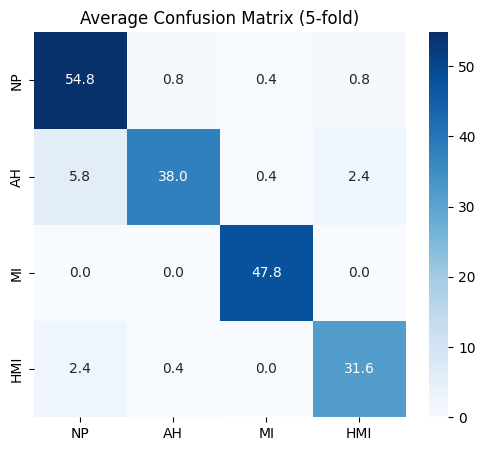

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(6,5))
sns.heatmap(mean_cm, annot=True, fmt=".1f", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.title("Average Confusion Matrix (5-fold)")
plt.show()


In [ ]:
import joblib


joblib.dump(model, "final_rf_model.joblib")

feature_extractor_path = "final_feature_extractor.h5"
extractor.save(feature_extractor_path)

print("Models saved successfully!")


Models saved successfully!


In [ ]:

import os, cv2, numpy as np
from tensorflow.keras.models import load_model
import joblib

FEATURE_EXTRACTOR_H5 = "final_feature_extractor.h5"
RF_MODEL_JOBLIB = "final_rf_model.joblib"


if not os.path.exists(FEATURE_EXTRACTOR_H5):
    raise FileNotFoundError(f"Feature extractor not found: {FEATURE_EXTRACTOR_H5}. "
                            "Make sure you saved it to this path.")

if not os.path.exists(RF_MODEL_JOBLIB):
    raise FileNotFoundError(f"RandomForest model not found: {RF_MODEL_JOBLIB}. "
                            "Make sure you saved it to this path.")


feature_extractor = load_model(FEATURE_EXTRACTOR_H5, compile=False)
rf = joblib.load(RF_MODEL_JOBLIB)

CLASSES = ["NP","AH","MI","HMI"]


def predict_ecg(img_path, crop_header_footer=True, header_px=50, footer_px=50, debug=False):
    """
    img_path: string path to image
    crop_header_footer: if True, attempt to remove top/bottom header/footer
    header_px/footer_px: pixel rows to remove from top and bottom (only if image height > header_px+footer_px+10)
    Returns: dict { 'pred_label', 'pred_index', 'probs' }
    """
    if not os.path.exists(img_path):
        raise FileNotFoundError(f"Image not found: {img_path}. Upload the image or provide a correct path.")

    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    if img is None:
        raise ValueError(f"cv2.imread failed to read the image (None). The file may be corrupted or not an image: {img_path}")

    h, w = img.shape[:2]
    if debug:
        print("Original shape:", img.shape)


    if crop_header_footer and (h > (header_px + footer_px + 10)):
        top = header_px
        bottom = h - footer_px
        img_cropped = img[top:bottom, :, :]
        if debug:
            print(f"Cropped rows {top}:{bottom} -> shape {img_cropped.shape}")
    else:
        img_cropped = img
        if crop_header_footer and debug:
            print("Skipping crop (image too small or cropping disabled).")

    img_rgb = cv2.cvtColor(img_cropped, cv2.COLOR_BGR2RGB)


    img_resized = cv2.resize(img_rgb, (227, 227), interpolation=cv2.INTER_AREA)


    img_norm = img_resized.astype("float32") / 255.0


    batch = np.expand_dims(img_norm, axis=0)


    feats = feature_extractor.predict(batch, verbose=0)


    probs = None
    try:

        if hasattr(rf, "predict_proba"):
            probs = rf.predict_proba(feats)[0]
        else:

            pred_index = int(rf.predict(feats)[0])
            probs = np.zeros(len(CLASSES))
            probs[pred_index] = 1.0
    except Exception as e:

        raise RuntimeError(f"RandomForest prediction failed: {e}")

    pred_index = int(np.argmax(probs))
    pred_label = CLASSES[pred_index]

    return {"pred_label": pred_label, "pred_index": pred_index, "probs": probs}


example = "augmented_data/NP/Normal(1).jpg"
print("Predicting:", example)
out = predict_ecg(example, crop_header_footer=True, header_px=40, footer_px=40, debug=True)
print("Predicted:", out['pred_label'], " probs:", out['probs'])


Predicting: augmented_data/NP/Normal(1).jpg
Original shape: (227, 227, 3)
Cropped rows 40:187 -> shape (147, 227, 3)
Predicted: AH  probs: [0.245 0.645 0.005 0.105]


In [ ]:

import os, glob, numpy as np, pandas as pd
from tensorflow.keras.models import load_model
import joblib
from sklearn.metrics import confusion_matrix, classification_report

FEATURE_EXTRACTOR = "final_feature_extractor.h5"
RF_MODEL = "final_rf_model.joblib"
CLASSES = ["NP","AH","MI","HMI"]


fe = load_model(FEATURE_EXTRACTOR, compile=False)
rf = joblib.load(RF_MODEL)

def predict_paths(paths):
    rows = []
    batch = []
    batch_paths = []
    for p in paths:
        batch_paths.append(p)
        img = tf.keras.preprocessing.image.load_img(p, target_size=(227,227))
        arr = np.asarray(img).astype("float32")/255.0
        batch.append(arr)
        if len(batch) >= 64:
            X = np.stack(batch, axis=0)
            F = fe.predict(X, verbose=0)
            probs = rf.predict_proba(F) if hasattr(rf, "predict_proba") else None
            preds = rf.predict(F)
            for i, bp in enumerate(batch_paths):
                pr = probs[i] if probs is not None else None
                rows.append({"filepath": bp, "pred_index": int(preds[i]),
                             "pred_label": CLASSES[int(preds[i])],
                             "probs": pr.tolist() if pr is not None else None})
            batch=[]; batch_paths=[]

    if batch:
        X = np.stack(batch, axis=0)
        F = fe.predict(X, verbose=0)
        probs = rf.predict_proba(F) if hasattr(rf, "predict_proba") else None
        preds = rf.predict(F)
        for i, bp in enumerate(batch_paths):
            pr = probs[i] if probs is not None else None
            rows.append({"filepath": bp, "pred_index": int(preds[i]),
                         "pred_label": CLASSES[int(preds[i])],
                         "probs": pr.tolist() if pr is not None else None})
    return pd.DataFrame(rows)

folder = "augmented_data/NP"
paths = sorted(glob.glob(os.path.join(folder, "*.*")))
df_preds = predict_paths(paths)
df_preds.to_csv("predictions_folder.csv", index=False)
print("Saved predictions_folder.csv — rows:", len(df_preds))


evaluate_on_fold = True
if evaluate_on_fold:
    folds_df = pd.read_csv("data_folds.csv")
    test_df = folds_df[folds_df['fold']==0]
    paths = test_df['filepath'].tolist()
    y_true = test_df['label'].values
    df_preds = predict_paths(paths)
    y_pred = df_preds['pred_index'].values
    print(classification_report(y_true, y_pred, target_names=CLASSES))
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion matrix:\n", cm)
    df_preds.to_csv("predictions_fold0.csv", index=False)
    print("Saved predictions_fold0.csv")


Saved predictions_folder.csv — rows: 284
              precision    recall  f1-score   support

          NP       1.00      1.00      1.00        57
          AH       1.00      1.00      1.00        47
          MI       1.00      1.00      1.00        48
         HMI       1.00      1.00      1.00        34

    accuracy                           1.00       186
   macro avg       1.00      1.00      1.00       186
weighted avg       1.00      1.00      1.00       186

Confusion matrix:
 [[57  0  0  0]
 [ 0 47  0  0]
 [ 0  0 48  0]
 [ 0  0  0 34]]
Saved predictions_fold0.csv


In [ ]:
from tensorflow.keras.models import load_model

fe = load_model("final_feature_extractor.h5", compile=False)
fe.save("final_feature_extractor.keras")
print("Saved final_feature_extractor.keras")


Saved final_feature_extractor.keras


In [ ]:
threshold = 0.6
def mark_uncertain(df):
    def top_prob(p):
        if p is None: return 1.0
        return max(p)
    df['top_prob'] = df['probs'].apply(lambda x: max(x) if x is not None else None)
    df['uncertain'] = df['top_prob'].apply(lambda v: True if v is not None and v < threshold else False)
    return df

df_preds = mark_uncertain(df_preds)
df_preds.to_csv("predictions_with_uncertainty.csv", index=False)
print(df_preds['uncertain'].value_counts(dropna=False))


uncertain
False    186
Name: count, dtype: int64


In [ ]:

import os, glob, json, numpy as np, pandas as pd, joblib
from tensorflow.keras.models import load_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

FEATURE_EX = "final_feature_extractor.keras"
RF_OUT = "final_rf_model_full.joblib"
META_OUT = "model_metadata.json"
DF = pd.read_csv("data_folds.csv")


extractor = load_model(FEATURE_EX, compile=False)
print("Loaded feature extractor:", FEATURE_EX)


filepaths = DF['filepath'].values
labels = DF['label'].values
print("Total samples:", len(filepaths))


def extract_feats_batch(model, paths, batch=64):
    feats = []
    for i in range(0, len(paths), batch):
        batch_paths = paths[i:i+batch]
        imgs = []
        for p in batch_paths:
            img = tf.keras.preprocessing.image.load_img(p, target_size=(227,227))
            arr = np.asarray(img).astype("float32")/255.0
            imgs.append(arr)
        X = np.stack(imgs, axis=0)
        f = model.predict(X, verbose=0)
        feats.append(f)
    return np.concatenate(feats, axis=0)

X = extract_feats_batch(extractor, filepaths, batch=64)
print("Extracted features shape:", X.shape)


scaler = StandardScaler().fit(X)
Xs = scaler.transform(X)


rf_full = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42, n_jobs=-1)
rf_full.fit(Xs, labels)
print("RandomForest trained on full dataset.")


joblib.dump(rf_full, RF_OUT)
joblib.dump(scaler, "final_scaler.joblib")
meta = {"classes": ["NP","AH","MI","HMI"], "feature_extractor": FEATURE_EX}
with open(META_OUT, "w") as f:
    json.dump(meta, f)
print("Saved RF ->", RF_OUT)
print("Saved scaler -> final_scaler.joblib")
print("Saved metadata ->", META_OUT)


Loaded feature extractor: final_feature_extractor.keras
Total samples: 928
Extracted features shape: (928, 512)
RandomForest trained on full dataset.
Saved RF -> final_rf_model_full.joblib
Saved scaler -> final_scaler.joblib
Saved metadata -> model_metadata.json


In [ ]:

app_code = r'''
import streamlit as st
import numpy as np, joblib, json
from tensorflow.keras.models import load_model
from PIL import Image
import io

FEATURE = "final_feature_extractor.keras"
RF = "final_rf_model_full.joblib"
SCALER = "final_scaler.joblib"
META = "model_metadata.json"

@st.cache_resource
def load_models():
    feat = load_model(FEATURE, compile=False)
    rf = joblib.load(RF)
    scaler = joblib.load(SCALER)
    with open(META,'r') as f:
        meta = json.load(f)
    return feat, rf, scaler, meta

st.title("ECG 4-class Classifier (CNN features + RandomForest)")
st.write("Upload ECG image (jpg/png)")

feat, rf, scaler, meta = load_models()

uploaded = st.file_uploader("Choose an ECG image", type=["jpg","jpeg","png"])
if uploaded:
    img = Image.open(io.BytesIO(uploaded.read())).convert("RGB")
    st.image(img, caption="Uploaded image", use_column_width=True)
    # safe crop: remove top/bottom if large
    arr = np.array(img)
    h = arr.shape[0]
    if h > 120:
        arr = arr[40:-40,:,:] if h > 100 else arr
    arr = Image.fromarray(arr).resize((227,227))
    X = np.asarray(arr).astype("float32")/255.0
    feat_vec = feat.predict(np.expand_dims(X,0))
    feat_scaled = scaler.transform(feat_vec)
    probs = rf.predict_proba(feat_scaled)[0] if hasattr(rf,'predict_proba') else None
    pred_idx = int(rf.predict(feat_scaled)[0])
    classes = meta['classes']
    st.write("Predicted class:", classes[pred_idx])
    if probs is not None:
        st.write("Class probabilities:")
        for c,p in zip(classes, probs):
            st.write(f"- {c}: {p:.3f}")
    else:
        st.write("Predicted (no probability available).")
'''
open("app.py","w").write(app_code)
print("Wrote app.py — run `streamlit run app.py` locally to start the demo (or in a VM).")


Wrote app.py — run `streamlit run app.py` locally to start the demo (or in a VM).


Found ml_results.csv
          model  mean_acc   std_acc
0          fold  2.000000  1.414214
1    GaussianNB  0.768346  0.076109
2           SVM  0.306033  0.001785
3  RandomForest  0.931049  0.019013
4           KNN  0.826539  0.074697
5           MLP  0.489375  0.131579


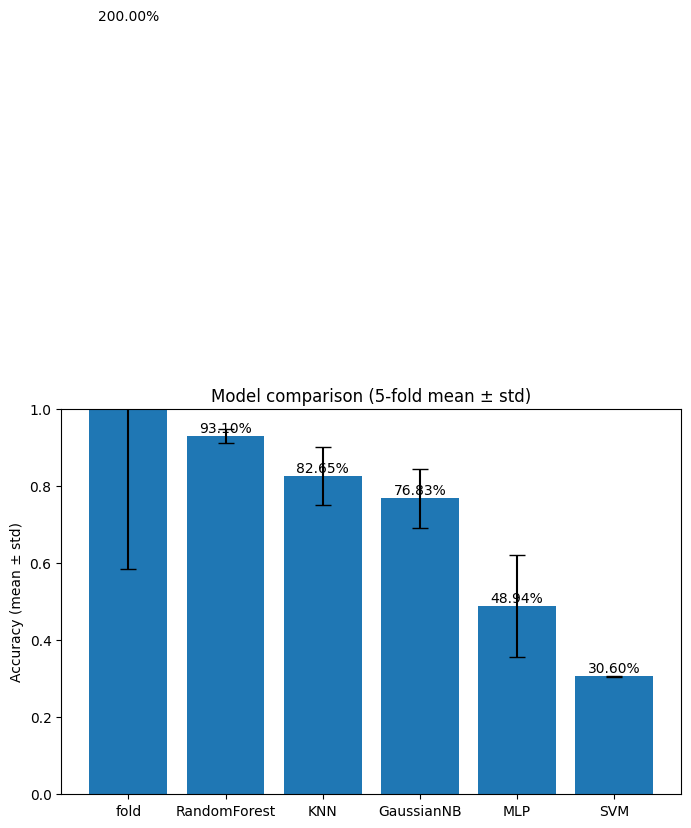

model  mean_acc   std_acc
0          fold  2.000000  1.414214
1  RandomForest  0.931049  0.019013
2           KNN  0.826539  0.074697
3    GaussianNB  0.768346  0.076109
4           MLP  0.489375  0.131579
5           SVM  0.306033  0.001785

In [ ]:

import os, glob, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, accuracy_score


all_results_summary = "results_noTL/all_results_summary.csv"

rows = []
if os.path.exists(ml_results_file):
    df_ml = pd.read_csv(ml_results_file)

    print("Found", ml_results_file)

    stats = df_ml.describe().loc[['mean','std']].T
    stats = stats[['mean','std']].rename(columns={'mean':'mean_acc','std':'std_acc'})
    stats = stats.reset_index().rename(columns={'index':'model'})
    print(stats)
else:
    print("ml_results.csv not found. Looking for results_noTL summary.")
    stats = None


if os.path.exists(all_results_summary):
    df_all = pd.read_csv(all_results_summary)

    available = [c for c in df_all.columns if c.endswith('_acc')]
    agg = df_all[available].agg(['mean','std']).T
    agg = agg.reset_index().rename(columns={'index':'model','mean':'mean_acc','std':'std_acc'})

    agg['model'] = agg['model'].str.replace('_acc','').str.upper()
    print("\nFrom all_results_summary.csv:\n", agg)

    if stats is None:
        stats = agg
    else:

        for _, r in agg.iterrows():
            if r['model'] not in stats['model'].values:
                stats = stats.append(r, ignore_index=True)


if stats is None:
    print("No summary CSVs found; trying to compute from per-fold saved files (fallback).")

    fold_dirs = sorted([d for d in os.listdir("results_customcnn_full") if d.startswith("fold_")])
    model_names = set()
    fold_acc = {}
    for fd in fold_dirs:
        csvf = os.path.join("results_customcnn_full", fd, "classical_ml_results.csv")
        if os.path.exists(csvf):
            df = pd.read_csv(csvf)
            for _, rr in df.iterrows():
                name = rr['model']
                acc = rr['acc']
                model_names.add(name)
                fold_acc.setdefault(name, []).append(acc)
    rows = []
    for m in model_names:
        arr = np.array(fold_acc[m])
        rows.append({'model':m, 'mean_acc':arr.mean(), 'std_acc':arr.std()})
    stats = pd.DataFrame(rows)
    print("Computed stats from per-folder classical_ml_results.csv")


if stats is not None and not stats.empty:
    stats = stats.sort_values('mean_acc', ascending=False).reset_index(drop=True)
    plt.figure(figsize=(8,5))
    plt.bar(stats['model'], stats['mean_acc'], yerr=stats['std_acc'], capsize=6)
    plt.ylim(0.0,1.0)
    plt.ylabel("Accuracy (mean ± std)")
    plt.title("Model comparison (5-fold mean ± std)")
    for i,row in stats.iterrows():
        plt.text(i, row['mean_acc']+0.01, f"{row['mean_acc']*100:.2f}%", ha='center')
    plt.show()

    display(stats)
else:
    print("No stats available to plot.")


Feature files not found. Extracting features from images now...
Processing class NP: 284 images


Extract NP: 100%|██████████| 284/284 [00:52<00:00,  5.39it/s]


Processing class AH: 233 images


Extract AH: 100%|██████████| 233/233 [00:29<00:00,  8.02it/s]


Processing class MI: 239 images


Extract MI: 100%|██████████| 239/239 [00:31<00:00,  7.51it/s]


Processing class HMI: 172 images


Extract HMI: 100%|██████████| 172/172 [00:21<00:00,  7.98it/s]


Saved all_features.npy, all_labels.npy, all_paths.npy
Features shape: (928, 512)

=== Training Keras MLP on CNN features (5-fold Stratified CV) ===

--- MLP fold 0 ---
Epoch 1/30
12/12 - 1s - 121ms/step - accuracy: 0.2817 - loss: 4.0851 - val_accuracy: 0.3065 - val_loss: 3.2540 - learning_rate: 1.0000e-04
Epoch 2/30
12/12 - 0s - 16ms/step - accuracy: 0.2547 - loss: 3.3881 - val_accuracy: 0.3065 - val_loss: 1.3770 - learning_rate: 1.0000e-04
Epoch 3/30
12/12 - 0s - 16ms/step - accuracy: 0.2763 - loss: 2.7645 - val_accuracy: 0.3065 - val_loss: 1.6367 - learning_rate: 1.0000e-04
Epoch 4/30
12/12 - 0s - 24ms/step - accuracy: 0.2709 - loss: 2.5630 - val_accuracy: 0.3065 - val_loss: 1.4014 - learning_rate: 1.0000e-04
Epoch 5/30

Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
12/12 - 0s - 16ms/step - accuracy: 0.2520 - loss: 2.2177 - val_accuracy: 0.3065 - val_loss: 1.3886 - learning_rate: 1.0000e-04
Epoch 6/30
12/12 - 0s - 17ms/step - accuracy: 0.2628 - loss: 2.1

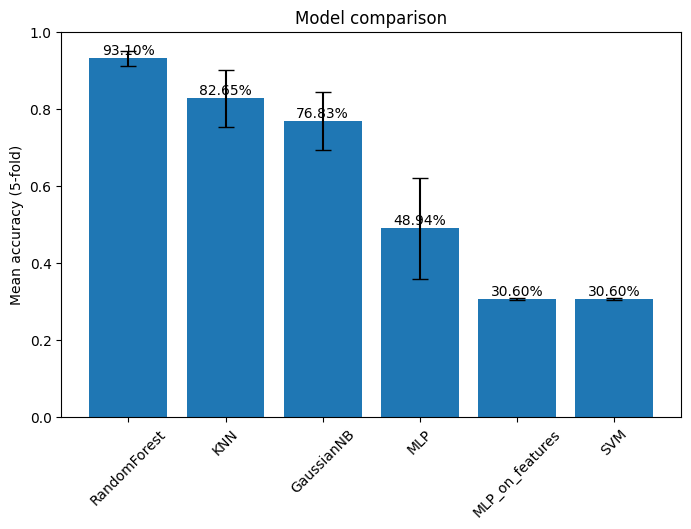


All done. Files saved:
 - all_features.npy
 - all_labels.npy
 - all_paths.npy
 - mlp_fold_<i>.keras (per-fold)
 - mlp_full.keras (final)
 - model_comparison.csv


In [ ]:

import os, time, numpy as np, pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import joblib


FEATURE_EX_PATH = "final_feature_extractor.keras"
CLASS_NAMES = ["NP","AH","MI","HMI"]
DATA_ROOT = "augmented_data"
ALL_FEAT_FILE = "all_features.npy"
ALL_LABEL_FILE = "all_labels.npy"
ALL_PATH_FILE = "all_paths.npy"
ML_RESULTS_CSV = "ml_results.csv"
CNN_SUMMARY_CSV = "results_noTL/all_results_summary.csv"

BATCH_SIZE_EXTRACT = 64
MLP_EPOCHS = 30
MLP_BATCH = 64
RANDOM_SEED = 42

os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

if os.path.exists(ALL_FEAT_FILE) and os.path.exists(ALL_LABEL_FILE) and os.path.exists(ALL_PATH_FILE):
    print("Found existing feature files. Loading...")
    X = np.load(ALL_FEAT_FILE)
    y = np.load(ALL_LABEL_FILE)
    paths = np.load(ALL_PATH_FILE)
    print("Loaded features:", X.shape, "labels:", y.shape)
else:
    print("Feature files not found. Extracting features from images now...")
    if not os.path.exists(FEATURE_EX_PATH):
        raise FileNotFoundError(f"Feature extractor not found: {FEATURE_EX_PATH}. Please save it and retry.")
    extractor = tf.keras.models.load_model(FEATURE_EX_PATH, compile=False)
    feats = []
    labels = []
    paths = []
    for lbl_idx, cls in enumerate(CLASS_NAMES):
        folder = os.path.join(DATA_ROOT, cls)
        if not os.path.exists(folder):
            raise FileNotFoundError(f"Data folder not found: {folder}")
        files = sorted([f for f in os.listdir(folder) if f.lower().endswith(('.jpg','.png','.jpeg'))])
        print(f"Processing class {cls}: {len(files)} images")
        for fname in tqdm(files, desc=f"Extract {cls}"):
            p = os.path.join(folder, fname)
            img = tf.keras.preprocessing.image.load_img(p, target_size=(227,227))
            arr = tf.keras.preprocessing.image.img_to_array(img).astype("float32")/255.0

            feat = extractor.predict(np.expand_dims(arr,0), verbose=0)[0]
            feats.append(feat)
            labels.append(lbl_idx)
            paths.append(p)
    X = np.stack(feats, axis=0)
    y = np.array(labels, dtype=np.int32)
    paths = np.array(paths, dtype=object)
    np.save(ALL_FEAT_FILE, X)
    np.save(ALL_LABEL_FILE, y)
    np.save(ALL_PATH_FILE, paths)
    print("Saved all_features.npy, all_labels.npy, all_paths.npy")
    print("Features shape:", X.shape)

print("\n=== Training Keras MLP on CNN features (5-fold Stratified CV) ===")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

def build_mlp_model(input_dim, num_classes=len(CLASS_NAMES)):
    inp = layers.Input(shape=(input_dim,))
    x = layers.Dense(512)(inp)
    x = layers.LeakyReLU(0.1)(x); x = layers.Dropout(0.4)(x)
    x = layers.Dense(256)(x)
    x = layers.LeakyReLU(0.1)(x); x = layers.Dropout(0.3)(x)
    out = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inp, out)
    return model

fold_stats = []
fold_idx = 0
val_preds_all = []
val_truth_all = []

for train_idx, val_idx in skf.split(X, y):
    print(f"\n--- MLP fold {fold_idx} ---")
    X_tr, X_val = X[train_idx], X[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]

    model = build_mlp_model(X.shape[1])
    model.compile(optimizer=optimizers.Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    cb = [
        callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True, verbose=1),
        callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7, verbose=1)
    ]
    hist = model.fit(X_tr, y_tr, validation_data=(X_val, y_val), epochs=MLP_EPOCHS,
                     batch_size=MLP_BATCH, callbacks=cb, verbose=2)


    probs = model.predict(X_val, verbose=0)
    preds = probs.argmax(axis=1)
    acc = accuracy_score(y_val, preds)
    prec, rec, f1, _ = precision_recall_fscore_support(y_val, preds, average='macro', zero_division=0)
    cm = confusion_matrix(y_val, preds)
    fold_stats.append({'fold': fold_idx, 'acc': acc, 'precision': prec, 'recall': rec, 'f1': f1})
    print(f"Fold {fold_idx}: acc={acc:.4f}, prec={prec:.4f}, rec={rec:.4f}, f1={f1:.4f}")
    val_preds_all.append(preds)
    val_truth_all.append(y_val)

    model.save(f"mlp_fold_{fold_idx}.keras", include_optimizer=False)
    fold_idx += 1
    tf.keras.backend.clear_session()

fold_df = pd.DataFrame(fold_stats)
print("\nMLP per-fold results:\n", fold_df)
print("\nMLP mean ± std:")
print(fold_df[['acc','precision','recall','f1']].agg(['mean','std']))


print("\nTraining final MLP on full dataset (best-of-fold architecture)...")
final_model = build_mlp_model(X.shape[1])
final_model.compile(optimizer=optimizers.Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cb_final = [callbacks.EarlyStopping(monitor='loss', patience=6, restore_best_weights=True, verbose=1)]
final_model.fit(X, y, epochs=MLP_EPOCHS, batch_size=MLP_BATCH, callbacks=cb_final, verbose=2)
final_model.save("mlp_full.keras", include_optimizer=False)
print("Saved final MLP: mlp_full.keras")


print("\n=== Building comparison table ===")
rows = []


rows.append({'model':'MLP_on_features', 'mean_acc': float(fold_df['acc'].mean()), 'std_acc': float(fold_df['acc'].std()),
             'mean_f1': float(fold_df['f1'].mean()), 'std_f1': float(fold_df['f1'].std())})


if os.path.exists(ML_RESULTS_CSV):
    try:
        df_mlres = pd.read_csv(ML_RESULTS_CSV)

        stats = df_mlres.drop(columns=['fold'], errors='ignore').agg(['mean','std']).T.reset_index()
        for _, r in stats.iterrows():
            model_name = r['index']
            rows.append({'model': model_name, 'mean_acc': float(r['mean']), 'std_acc': float(r['std']), 'mean_f1': np.nan, 'std_f1': np.nan})
    except Exception as e:
        print("Failed to load ml_results.csv:", e)
else:
    print("ml_results.csv not found; skipping classical ML entries (you already reported RF ~0.93 earlier).")


if os.path.exists(CNN_SUMMARY_CSV):
    try:
        df_all = pd.read_csv(CNN_SUMMARY_CSV)

        if 'cnn_acc' in df_all.columns:
            mean_cnn = df_all['cnn_acc'].mean()
            std_cnn = df_all['cnn_acc'].std()
            rows.append({'model':'Custom_CNN', 'mean_acc': float(mean_cnn), 'std_acc': float(std_cnn), 'mean_f1': np.nan, 'std_f1': np.nan})
    except Exception as e:
        print("Failed to read CNN summary:", e)
else:
    print("CNN summary CSV not found; if you want to include CNN numbers, save them to", CNN_SUMMARY_CSV)

comp_df = pd.DataFrame(rows)

comp_df = comp_df.sort_values('mean_acc', ascending=False, na_position='last').reset_index(drop=True)
comp_df.to_csv("model_comparison.csv", index=False)
print("Saved model_comparison.csv")
print(comp_df)


plt.figure(figsize=(8,5))
x = comp_df['model']
y = comp_df['mean_acc']
yerr = comp_df['std_acc'].fillna(0)
plt.bar(x, y, yerr=yerr, capsize=6)
plt.ylim(0,1)
plt.ylabel("Mean accuracy (5-fold)")
plt.title("Model comparison")
for i,v in enumerate(y):
    plt.text(i, v+0.01, f"{v*100:.2f}%", ha='center')
plt.xticks(rotation=45)
plt.show()

print("\nAll done. Files saved:\n - all_features.npy\n - all_labels.npy\n - all_paths.npy\n - mlp_fold_<i>.keras (per-fold)\n - mlp_full.keras (final)\n - model_comparison.csv")
